Welcome!  In this notebook we will step you through how to work with high-level data products that will be produced by the time-series branch of the JWST pipeline.  This exercise was compiled by Nikole Lewis (STScI) with significant inputs from Jason Rowe (UdeM) and Jeff Valenti (STScI).

In [14]:
#First let's load some useful modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline
import pickle
import glob, os

In [47]:
"""
Note: These 1D Spectra are not given as a time series, but as a series of different impact parameters from 0 to 2 (in the respective 14 .txt files)
"""

'\nNote: These 1D Spectra are not given as a time series, but as a series of different impact parameters from 0 to 2 (in the respective 14 .txt files)\n'

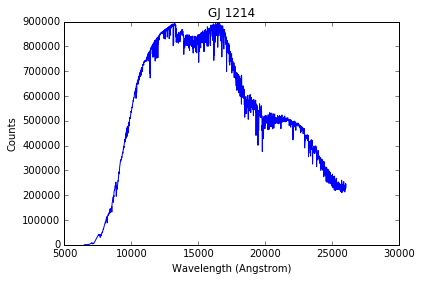

In [75]:
# Load the spectrum of GJ 1214 b
N_files = 14

b = np.zeros(14)
wavelength = np.zeros( (14, 2048) )
flux = np.zeros( (14, 2048) )

for i,filename in enumerate( glob.glob("GJ_1214_b_spectra/*.txt") ):
    b[i] = np.int64( filename[27:30] ) / 100.
    data = np.loadtxt( filename )
    wavelength[i,:] = data[:,0]
    flux[i,:] = data[:,1]

plt.figure()
#for i in range(N_files):
#    plt.plot( wavelength[i], flux[i] )
plt.plot( wavelength[0], flux[0] )
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Counts')
plt.title('GJ 1214')

In [17]:
N_exp = wavelength.shape[0]
N_pix = wavelength.shape[1]

counts = np.zeros(N_exp)
for exp in range(N_exp):   
    counts[exp] = np.sum( flux[exp, :] )

(0.98, 1.005)

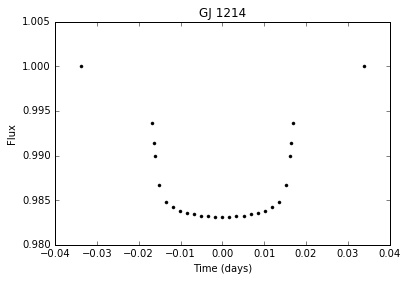

In [82]:
plt.figure()

#recalculate the time of transit from the impact parameter geometrically
P = 1.58040456 #Period of GJ 1214 b
a = 14.9 #semi-major axis of GJ 1214 b
t = np.arcsin(b/a) * P / (2*np.pi) #convert from impact parameter into time

#reset transit midpoint to 0
t = t - t[0]

#mirror the transit
t2 = np.append( -t[1::][::-1], t )
counts2 = np.append( counts[1::][::-1], counts )
counts2 /= counts2[0]

plt.plot( t2, counts2, 'k.' )
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.title('GJ 1214')
plt.ylim([0.98,1.005])

Now for the multi-color photometry!

In [83]:
pickle.dump( [t2, counts2], open('GJ1214b_white.pickle','wb') )

In [84]:
N_bands = 16
counts_bands = np.zeros((N_exp, N_bands))
for exp in np.arange(0,N_exp):
    for band in np.arange(0, N_bands):
        counts_bands[exp, band] = np.sum( flux[exp, int(1.*N_pix/N_bands*band):int(1.*N_pix/N_bands*band+1)] )

In [85]:
#recalculate the time of transit from the impact parameter geometrically
counts_bands = np.vstack( (counts_bands[1::,:][::-1,:], counts_bands) )

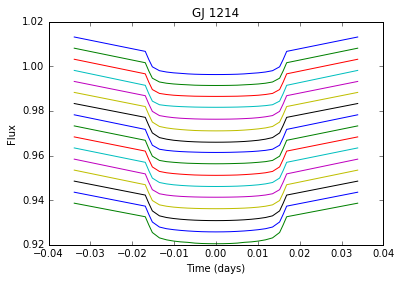

In [86]:
plt.figure()
for i in range(N_bands):
    plt.plot(t2, counts_bands[:,i] / np.mean(counts_bands[:,i]) - 0.005*i)
plt.ylabel('Flux')
plt.xlabel('Time (days)')
plt.title('GJ 1214')

[[ 247571.83653013  284059.8428891   396558.92120057  496363.93292103
   524941.0808822   468585.26834664  603494.22208283  782679.16809629
   890404.10483705  855491.39880914  845063.4065661   871150.50794099
   751922.22414336  488120.54596832  174670.37553656   40669.39625425]
 [ 245998.37784227  282235.06189932  394001.90441819  493091.44434458
   521635.02133843  465657.95722799  599803.97096818  777625.76501344
   884737.48677834  850122.73201728  839695.47526594  865472.47925719
   747069.76282779  485111.55660169  173594.49928789   40425.69615758]
 [ 245458.25268551  281611.32593182  393119.95561267  491975.09602788
   520476.03017799  464637.98640372  598494.02512284  775879.54042652
   882755.42035611  848230.53039844  837828.75321871  863530.32238826
   745400.89801656  484043.26918555  173211.4684955    40337.74233318]
 [ 245100.63942715  281199.85487492  392536.61399857  491239.64768736
   519706.01277917  463960.19944807  597619.93131509  774721.43317321
   881437.2276791

(0.995, 0.998)

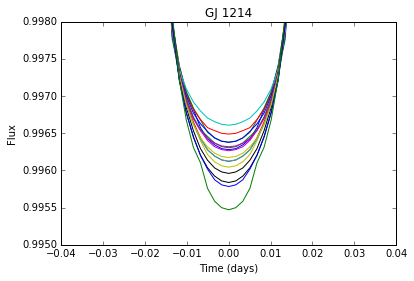

In [93]:
plt.figure()
for i in range(N_bands):
    plt.plot(t2, counts_bands[:,i] / np.mean(counts_bands[:,i]))
plt.ylabel('Flux')
plt.xlabel('Time (days)')
plt.title('GJ 1214')
plt.ylim([0.995,0.998])

In [92]:
pickle.dump( [t2, counts_bands], open('GJ1214b_16bands.pickle','wb') )